In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

In [2]:
data_dir = "D:/hust/20232/nlp/project/main/nlp_2023.2/data/atis_snips_v2"

# ATIS

In [3]:
train_data_atis = pd.read_csv(os.path.join(data_dir, 'atis', 'train.csv'))
dev_data_atis = pd.read_csv(os.path.join(data_dir, 'atis', 'dev.csv'))
test_data_atis = pd.read_csv(os.path.join(data_dir, 'atis', 'test.csv'))
data_atis = pd.concat([train_data_atis, dev_data_atis])

intent_dict_atis = pd.read_csv(os.path.join(data_dir, 'atis', 'intent_dict.csv'))
slot_dict_atis = pd.read_csv(os.path.join(data_dir, 'atis', 'slot_dict.csv'))


In [10]:
train_data_atis

text  \
0     i want to fly from baltimore to dallas round trip   
1     round trip fares from baltimore to philadelphi...   
2     show me the flights arriving on baltimore on j...   
3     what are the flights which depart from san fra...   
4     which airlines fly from boston to washington d...   
...                                                 ...   
4473  what's the first flight after 1 pm leaving was...   
4474  what are the nonstop flights on america west o...   
4475  tell me about ground transportation between or...   
4476  i'd like a twa flight from las vegas to new yo...   
4477  is there a delta flight from denver to san fra...   

                                                   edge  \
0     i want to fly from baltimore to dallas round trip   
1     round trip fares from baltimore to philadelphi...   
2     show me the flights arriving on baltimore on j...   
3     what are the flights which depart from san fra...   
4     which airlines fly from boston to washington d...   
...                                                 ...   
4473  what's the first flight after 1 pm leaving was...   
4474  what are the nonstop flights on america west o...   
4475  tell me about ground transportation between or...   
4476  i'd like a twa flight from las vegas to new yo...   
4477  is there a delta flight from denver to san fra...   

                                                   slot               intent  
0     O O O O O B-fromloc.city_name O B-toloc.city_n...          atis_flight  
1     B-round_trip I-round_trip O O B-fromloc.city_n...         atis_airfare  
2     O O O O O O B-toloc.city_name O B-arrive_date....          atis_flight  
3     O O O O O O O B-fromloc.city_name I-fromloc.ci...          atis_flight  
4     O O O O B-fromloc.city_name O B-toloc.city_nam...         atis_airline  
...                                                 ...                  ...  
4473  O O B-flight_mod O B-depart_time.time_relative...          atis_flight  
4474  O O O B-flight_stop O O B-airline_name I-airli...          atis_flight  
4475  O O O O O O B-fromloc.airport_name I-fromloc.a...  atis_ground_service  
4476  O O O B-airline_code O O B-fromloc.city_name I...          atis_flight  
4477  O O O B-airline_name O O B-fromloc.city_name O...          atis_flight  

[4478 rows x 4 columns]

In [11]:
dev_data_atis

text  \
0    i want to fly from boston at 838 am and arrive...   
1    show me all round trip flights between houston...   
2    i would like some information on a flight from...   
3    what are the coach flights between dallas and ...   
4               i'm flying from boston to the bay area   
..                                                 ...   
495                       pm flights dallas to atlanta   
496  information on flights from baltimore to phila...   
497  what flights from atlanta to st. louis on tues...   
498     show me ground transportation in san francisco   
499  what flights do you have from newark new jerse...   

                                                  edge  \
0    i want to fly from boston at 838 am and arrive...   
1    show me all round trip flights between houston...   
2    i would like some information on a flight from...   
3    what are the coach flights between dallas and ...   
4               i'm flying from boston to the bay area   
..                                                 ...   
495                       pm flights dallas to atlanta   
496  information on flights from baltimore to phila...   
497  what flights from atlanta to st. louis on tues...   
498     show me ground transportation in san francisco   
499  what flights do you have from newark new jerse...   

                                                  slot               intent  
0    O O O O O B-fromloc.city_name O B-depart_time....          atis_flight  
1    O O O B-round_trip I-round_trip O O B-fromloc....          atis_flight  
2    O O O O O O O O O B-fromloc.city_name O B-tolo...          atis_flight  
3    O O O B-class_type O O B-fromloc.city_name O B...          atis_flight  
4    O O O B-fromloc.city_name O O B-toloc.city_nam...          atis_flight  
..                                                 ...                  ...  
495  B-depart_time.period_of_day O B-fromloc.city_n...          atis_flight  
496    O O O O B-fromloc.city_name O B-toloc.city_name          atis_flight  
497  O O O B-fromloc.city_name O B-toloc.city_name ...          atis_flight  
498                  O O O O O B-city_name I-city_name  atis_ground_service  
499  O O O O O O B-fromloc.city_name B-fromloc.stat...          atis_flight  

[500 rows x 4 columns]

In [12]:
data_atis

text  \
0    i want to fly from baltimore to dallas round trip   
1    round trip fares from baltimore to philadelphi...   
2    show me the flights arriving on baltimore on j...   
3    what are the flights which depart from san fra...   
4    which airlines fly from boston to washington d...   
..                                                 ...   
495                       pm flights dallas to atlanta   
496  information on flights from baltimore to phila...   
497  what flights from atlanta to st. louis on tues...   
498     show me ground transportation in san francisco   
499  what flights do you have from newark new jerse...   

                                                  edge  \
0    i want to fly from baltimore to dallas round trip   
1    round trip fares from baltimore to philadelphi...   
2    show me the flights arriving on baltimore on j...   
3    what are the flights which depart from san fra...   
4    which airlines fly from boston to washington d...   
..                                                 ...   
495                       pm flights dallas to atlanta   
496  information on flights from baltimore to phila...   
497  what flights from atlanta to st. louis on tues...   
498     show me ground transportation in san francisco   
499  what flights do you have from newark new jerse...   

                                                  slot               intent  
0    O O O O O B-fromloc.city_name O B-toloc.city_n...          atis_flight  
1    B-round_trip I-round_trip O O B-fromloc.city_n...         atis_airfare  
2    O O O O O O B-toloc.city_name O B-arrive_date....          atis_flight  
3    O O O O O O O B-fromloc.city_name I-fromloc.ci...          atis_flight  
4    O O O O B-fromloc.city_name O B-toloc.city_nam...         atis_airline  
..                                                 ...                  ...  
495  B-depart_time.period_of_day O B-fromloc.city_n...          atis_flight  
496    O O O O B-fromloc.city_name O B-toloc.city_name          atis_flight  
497  O O O B-fromloc.city_name O B-toloc.city_name ...          atis_flight  
498                  O O O O O B-city_name I-city_name  atis_ground_service  
499  O O O O O O B-fromloc.city_name B-fromloc.stat...          atis_flight  

[4978 rows x 4 columns]

In [21]:
test_data_atis

text  \
0    i would like to find a flight from charlotte t...   
1    on april first i need a ticket from tacoma to ...   
2    on april first i need a flight going from phoe...   
3    i would like a flight traveling one way from p...   
4    i would like a flight from orlando to salt lak...   
..                                                 ...   
888  please find all the flights from cincinnati to...   
889  find me a flight from cincinnati to any airpor...   
890  i'd like to fly from miami to chicago on ameri...   
891  i would like to book a round trip flight from ...   
892  find me a flight that flies from memphis to ta...   

                                                  edge  \
0    i would like to find a flight from charlotte t...   
1    on april first i need a ticket from tacoma to ...   
2    on april first i need a flight going from phoe...   
3    i would like a flight traveling one way from p...   
4    i would like a flight from orlando to salt lak...   
..                                                 ...   
888  please find all the flights from cincinnati to...   
889  find me a flight from cincinnati to any airpor...   
890  i'd like to fly from miami to chicago on ameri...   
891  i would like to book a round trip flight from ...   
892  find me a flight that flies from memphis to ta...   

                                                  slot        intent  
0    O O O O O O O O B-fromloc.city_name O B-toloc....   atis_flight  
1    O B-depart_date.month_name B-depart_date.day_n...  atis_airfare  
2    O B-depart_date.month_name B-depart_date.day_n...   atis_flight  
3    O O O O O O B-round_trip I-round_trip O B-from...   atis_flight  
4    O O O O O O B-fromloc.city_name O B-toloc.city...   atis_flight  
..                                                 ...           ...  
888  O O O O O O B-fromloc.city_name O O O O O B-to...   atis_flight  
889  O O O O O B-fromloc.city_name O O O O O B-tolo...   atis_flight  
890  O O O O O B-fromloc.city_name O B-toloc.city_n...   atis_flight  
891  O O O O O O B-round_trip I-round_trip O O B-fr...   atis_flight  
892  O O O O O O O B-fromloc.city_name O B-toloc.ci...   atis_flight  

[893 rows x 4 columns]

In [15]:
print("Training Data Overview")
train_data_atis.head()

Training Data Overview


text  \
0  i want to fly from baltimore to dallas round trip   
1  round trip fares from baltimore to philadelphi...   
2  show me the flights arriving on baltimore on j...   
3  what are the flights which depart from san fra...   
4  which airlines fly from boston to washington d...   

                                                edge  \
0  i want to fly from baltimore to dallas round trip   
1  round trip fares from baltimore to philadelphi...   
2  show me the flights arriving on baltimore on j...   
3  what are the flights which depart from san fra...   
4  which airlines fly from boston to washington d...   

                                                slot        intent  
0  O O O O O B-fromloc.city_name O B-toloc.city_n...   atis_flight  
1  B-round_trip I-round_trip O O B-fromloc.city_n...  atis_airfare  
2  O O O O O O B-toloc.city_name O B-arrive_date....   atis_flight  
3  O O O O O O O B-fromloc.city_name I-fromloc.ci...   atis_flight  
4  O O O O B-fromloc.city_name O B-toloc.city_nam...  atis_airline

In [17]:
print("Intent Dictionary Overview")
intent_dict_atis.head()

Intent Dictionary Overview


Unnamed: 0                                    intent
0           0                         atis_abbreviation
1           1                             atis_aircraft
2           2  atis_aircraft#atis_flight#atis_flight_no
3           3                              atis_airfare
4           4                  atis_airfare#atis_flight

In [19]:
print("Slot Dictionary Overview")
slot_dict_atis.head()

Slot Dictionary Overview


Unnamed: 0                  slot
0           0                     O
1           1      I-transport_type
2           2    I-toloc.state_name
3           3     I-toloc.city_name
4           4  I-toloc.airport_name

In [23]:
num_train = len(train_data_atis)
num_dev = len(dev_data_atis)
num_test = len(test_data_atis)
print(f"Number of samples in the data:\nTrain Data: {num_train} sampples\nDev Data: {num_dev} samples\nTest Data: {num_test} samples")

Number of samples in the data:
Train Data: 4478 sampples
Dev Data: 500 samples
Test Data: 893 samples


In [24]:
num_intent = len(intent_dict_atis)
print(f"Number of intents in the data: {num_intent}")

Number of intents in the data: 26


In [32]:
num_slot_tag = len(slot_dict_atis)
num_info = len(slot_dict_atis[slot_dict_atis['slot'].str.startswith('B')])
print(f"Number of slot tags: {num_slot_tag}")
print(f"Number of unique information categories: {num_info}")

Number of slot tags: 127
Number of unique information categories: 83


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4888\1407902677.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='count', y='intent', data=intent_distribution, palette='viridis')


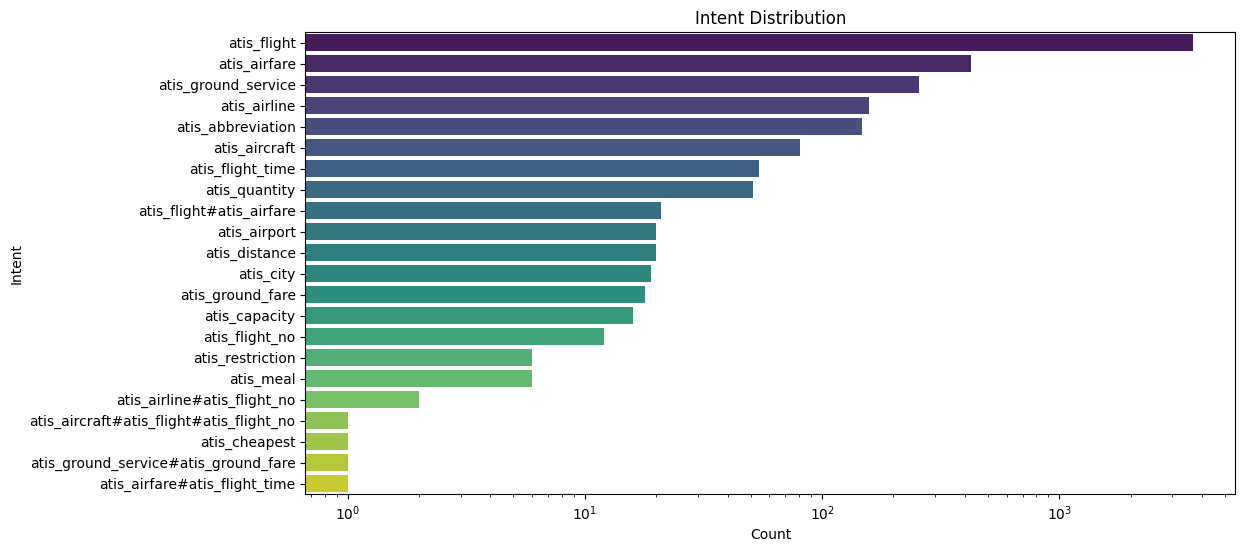

In [48]:
intent_distribution = data_atis['intent'].value_counts().reset_index()
intent_distribution.columns = ['intent', 'count']

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='count', y='intent', data=intent_distribution, palette='viridis')

ax.set_xscale('log')

plt.title('Intent Distribution')
plt.xlabel('Count')
plt.ylabel('Intent')
plt.show()

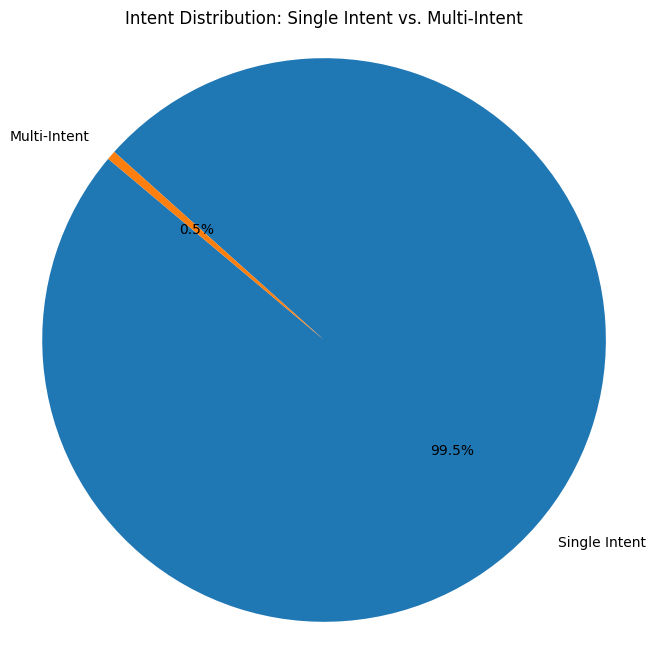

In [4]:
# Calculate the number of intents for each entry
data_atis['num_intents'] = data_atis['intent'].str.count('#') + 1

# Categorize entries as single intent or multi-intent
data_atis['intent_type'] = data_atis['num_intents'].apply(lambda x: 'Single Intent' if x == 1 else 'Multi-Intent')

# Calculate the distribution of single intent vs. multi-intent
intent_distribution = data_atis['intent_type'].value_counts().reset_index()
intent_distribution.columns = ['Intent Type', 'Count']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(intent_distribution['Count'], labels=intent_distribution['Intent Type'], autopct='%1.1f%%', startangle=140)
plt.title('Intent Distribution: Single Intent vs. Multi-Intent')
plt.axis('equal')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4888\1852450211.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='count', y='slot', data=slot_list, palette='viridis')


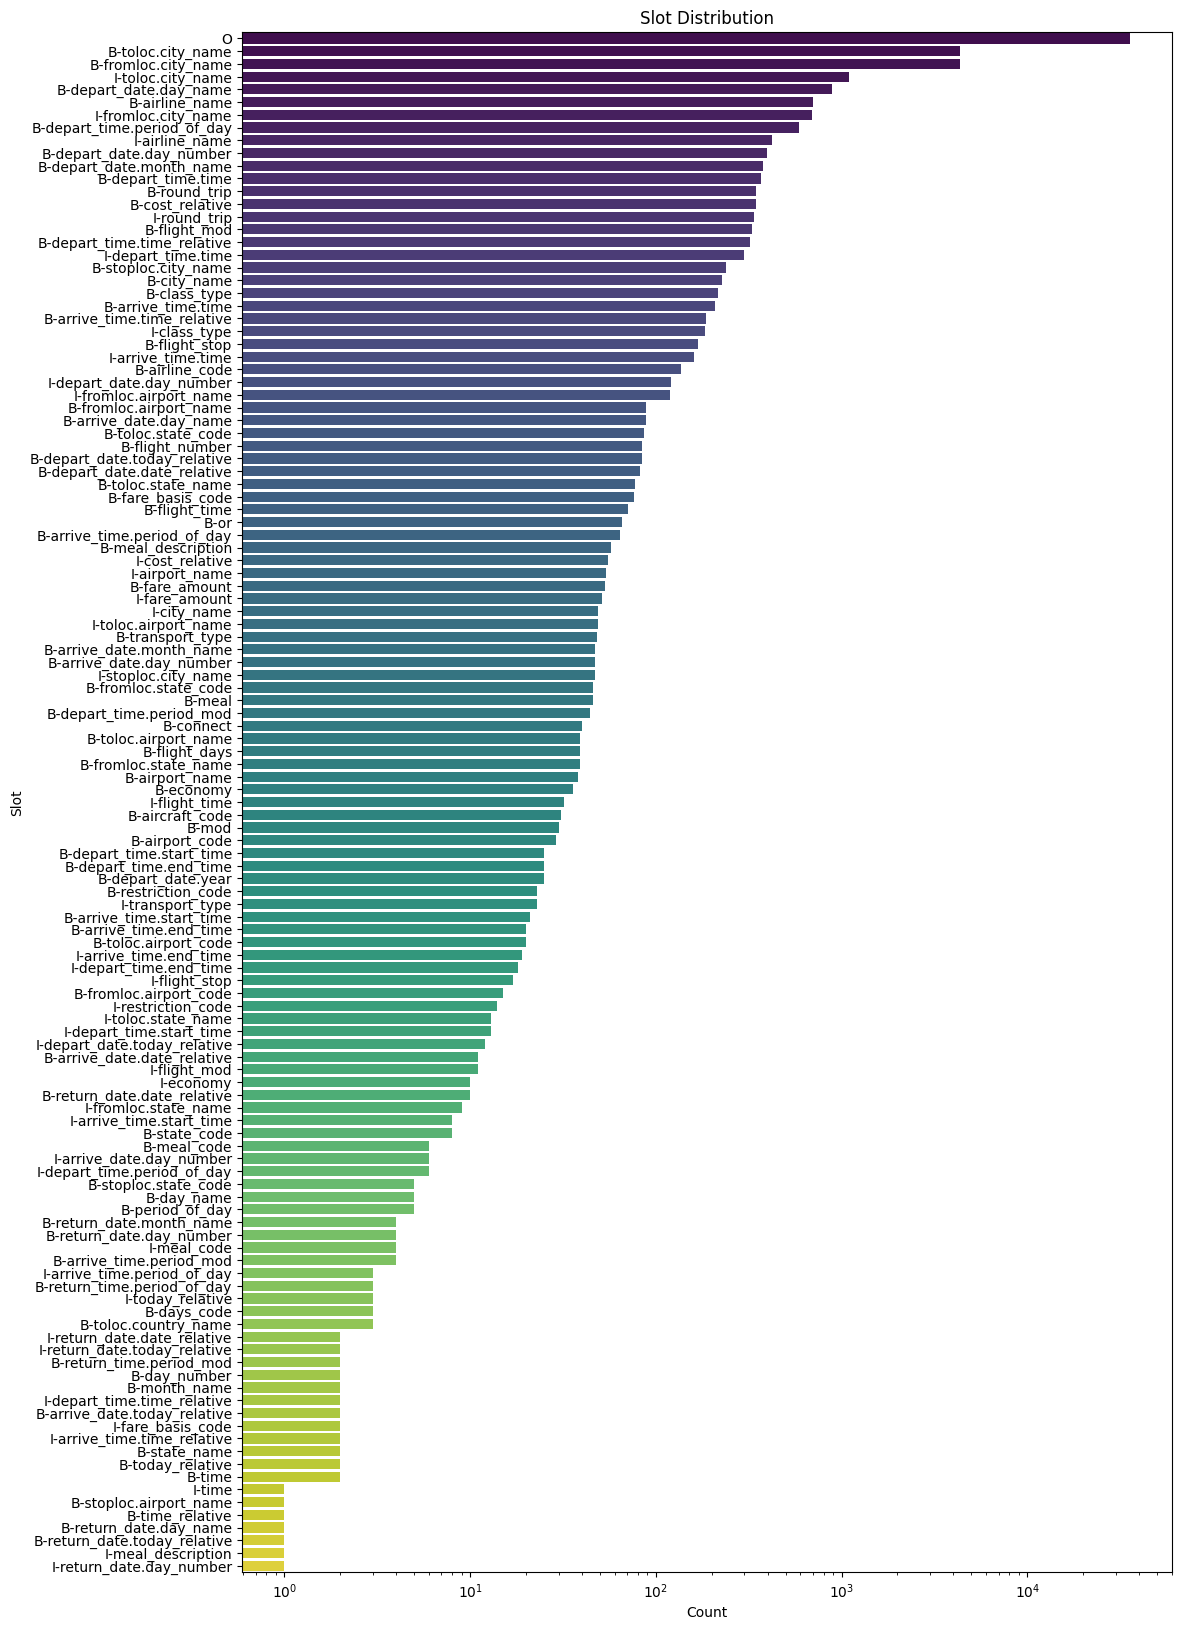

In [53]:
# Slot Distribution
slot_list = data_atis['slot'].apply(lambda x: x.split()).explode().value_counts().reset_index()
slot_list.columns = ['slot', 'count']

plt.figure(figsize=(12, 20))
ax = sns.barplot(x='count', y='slot', data=slot_list, palette='viridis')
ax.set_xscale('log')
plt.title('Slot Distribution')
plt.xlabel('Count')
plt.ylabel('Slot')
plt.show()

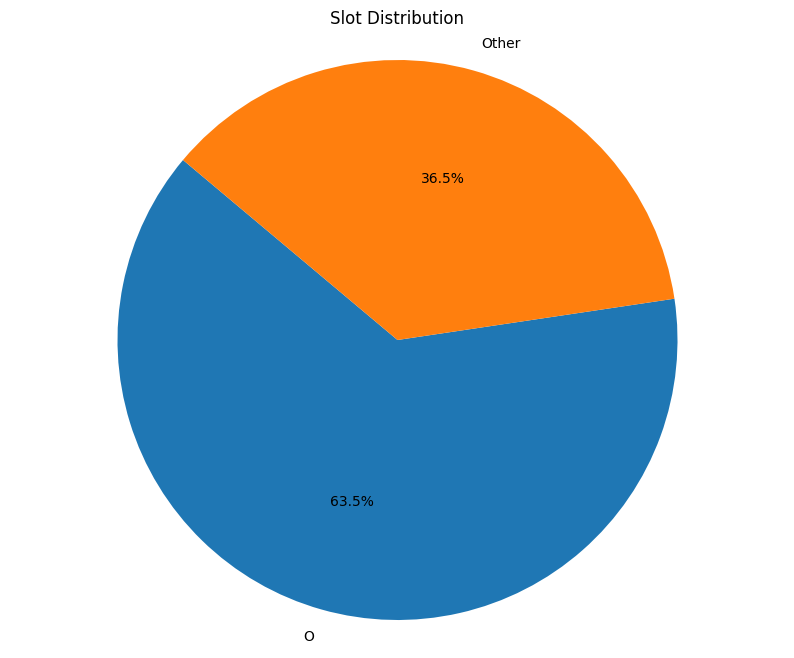

In [75]:
# Slot Distribution
slot_list = data_atis['slot'].apply(lambda x: x.split()).explode().value_counts()

# Calculate the total count of slots
total_count = slot_list.sum()

# Calculate the cutoff value
cutoff_value = 0.1 * total_count

# Identify slots below the cutoff value
small_slots = slot_list[slot_list < cutoff_value]

# Combine small slots into 'Other' category
other_count = small_slots.sum()
slot_list = slot_list.drop(small_slots.index)
slot_list['Other'] = other_count

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(slot_list, labels=slot_list.index, autopct='%1.1f%%', startangle=140)
plt.title('Slot Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

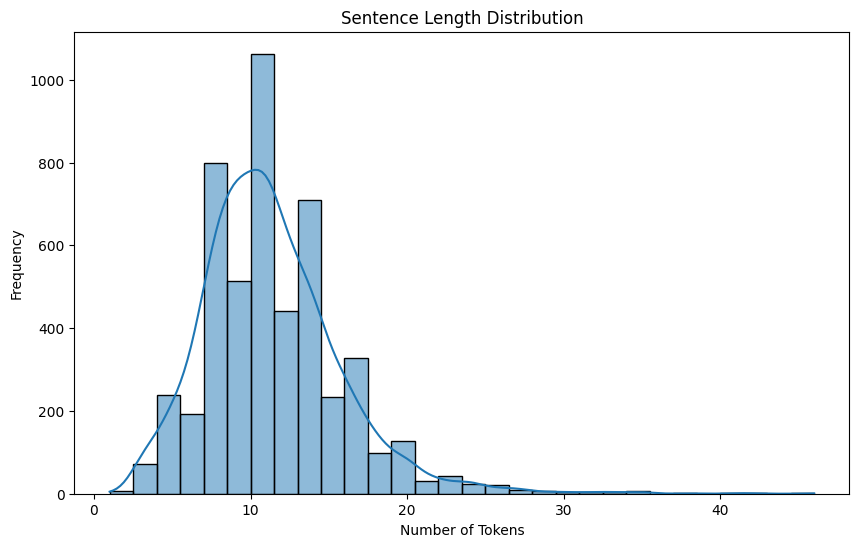

In [55]:
# Token Analysis
data_atis['num_tokens'] = data_atis['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data_atis['num_tokens'], kde=True, bins=30)
plt.title('Sentence Length Distribution')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()


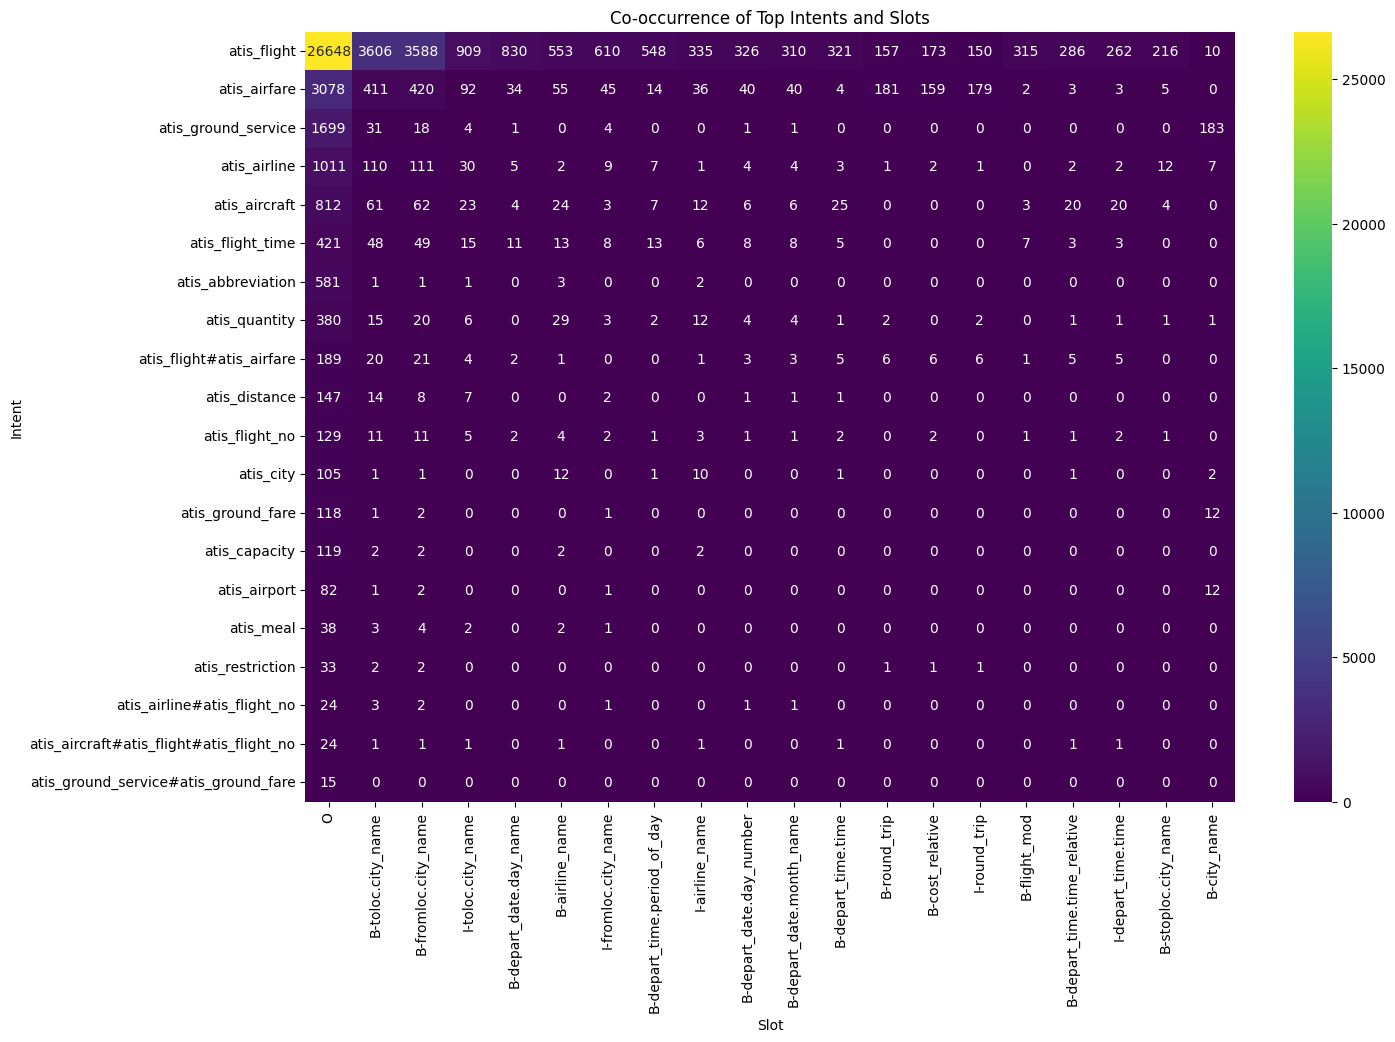

In [68]:
# Split slots into separate rows
data_slots_expanded = data_atis.copy()
data_slots_expanded['slot'] = data_slots_expanded['slot'].apply(lambda x: x.split())

# Create a new dataframe to store intent-slot pairs
intent_slot_pairs = []
for _, row in data_slots_expanded.iterrows():
    intent = row['intent']
    slots = row['slot']
    for slot in slots:
        intent_slot_pairs.append((intent, slot))

data_intent_slot = pd.DataFrame(intent_slot_pairs, columns=['intent', 'slot'])

# Co-occurrence Analysis between Intents and Slots
intent_slot_cooccurrence = pd.crosstab(data_intent_slot['intent'], data_intent_slot['slot'])

# Get top N slots and intents
N = 20
top_slots = intent_slot_cooccurrence.sum().sort_values(ascending=False).head(N).index
top_intents = intent_slot_cooccurrence.loc[:, top_slots].sum(axis=1).sort_values(ascending=False).head(N).index

# Filter the co-occurrence matrix
filtered_cooccurrence = intent_slot_cooccurrence.loc[top_intents, top_slots]

plt.figure(figsize=(15, 10))
sns.heatmap(filtered_cooccurrence, cmap='viridis', annot=True, fmt="d")
plt.title('Co-occurrence of Top Intents and Slots')
plt.xlabel('Slot')
plt.ylabel('Intent')

# Rotate X-axis labels
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

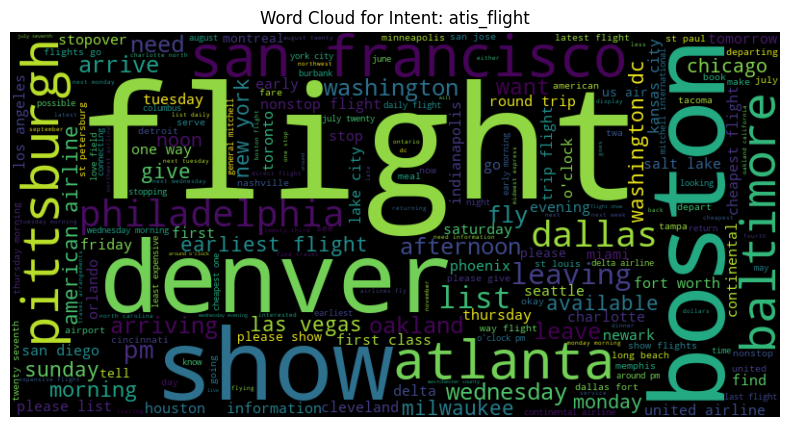

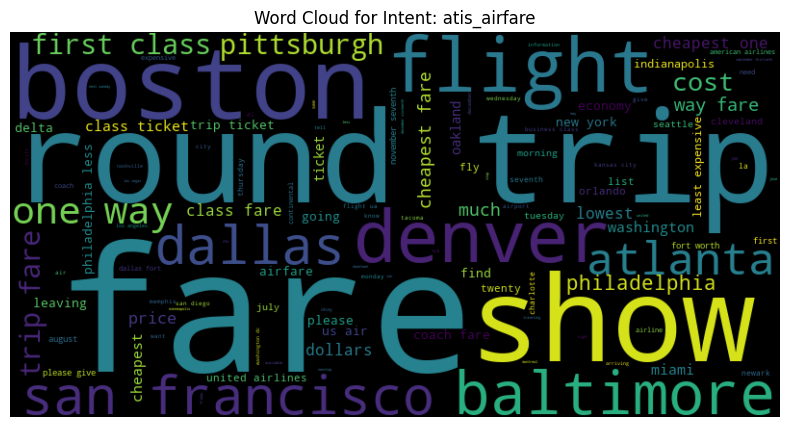

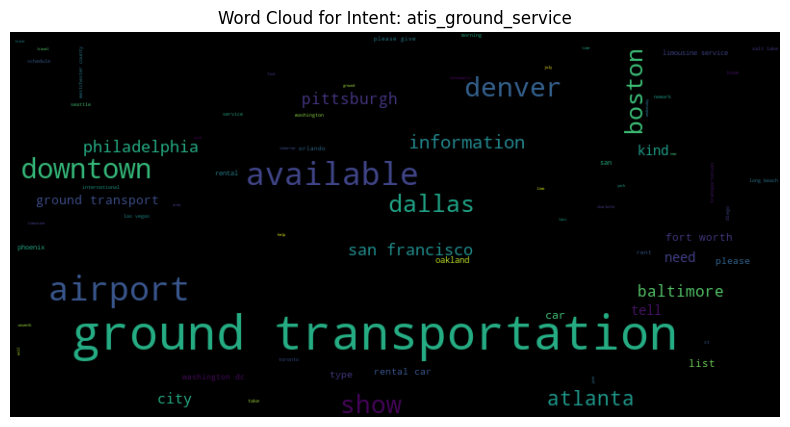

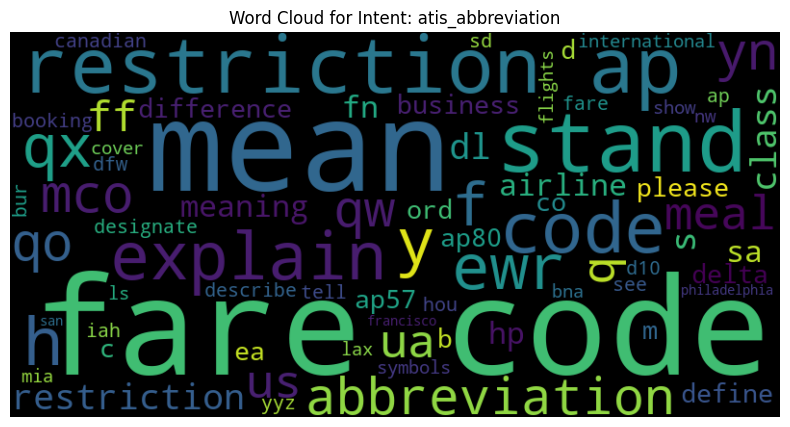

In [65]:
# Count occurrences of each intent
intent_counts = data_atis['intent'].value_counts()

# Determine top intents, let's say top 5
top_intents = intent_counts.head(5).index.tolist()

# Word Cloud for each top intent
for intent in top_intents:
    text = ' '.join(data_atis[data_atis['intent'] == intent]['text'])
    wordcloud = WordCloud(width=800, height=400).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Intent: {intent}')
    plt.axis('off')
    plt.show()

# SNIPS

In [5]:
train_data_snips = pd.read_csv(os.path.join(data_dir, 'snips', 'train.csv'))
dev_data_snips = pd.read_csv(os.path.join(data_dir, 'snips', 'dev.csv'))
test_data_snips = pd.read_csv(os.path.join(data_dir, 'snips', 'test.csv'))
data_snips = pd.concat([train_data_snips, dev_data_snips])

intent_dict_snips = pd.read_csv(os.path.join(data_dir, 'snips', 'intent_dict.csv'))
slot_dict_snips = pd.read_csv(os.path.join(data_dir, 'snips', 'slot_dict.csv'))


In [77]:
train_data_snips

text  \
0       listen to westbam alumb allergic on google music   
1             add step to me to the 50 clásicos playlist   
2      i give this current textbook a rating value of...   
3                   play the song little robin redbreast   
4      please add iris dement to my playlist this is ...   
...                                                  ...   
13079      i want to eat choucroute at a brasserie for 8   
13080                            play funky heavy bluesy   
13081           rate the current album 2 points out of 6   
13082             go to the photograph the inflated tear   
13083                     rate richard carvel 4 out of 6   

                                                    edge  \
0       listen to westbam alumb allergic on google music   
1             add step to me to the 50 clásicos playlist   
2      i give this current textbook a rating value of...   
3                   play the song little robin redbreast   
4      please add iris dement to my playlist this is ...   
...                                                  ...   
13079      i want to eat choucroute at a brasserie for 8   
13080                            play funky heavy bluesy   
13081           rate the current album 2 points out of 6   
13082             go to the photograph the inflated tear   
13083                     rate richard carvel 4 out of 6   

                                                    slot              intent  
0           O O B-artist O B-album O B-service I-service           PlayMusic  
1      O B-entity_name I-entity_name I-entity_name O ...       AddToPlaylist  
2      O O O B-object_select B-object_type O O O O B-...            RateBook  
3               O O B-music_item B-track I-track I-track           PlayMusic  
4      O O B-artist I-artist O B-playlist_owner O B-p...       AddToPlaylist  
...                                                  ...                 ...  
13079  O O O O B-served_dish O O B-restaurant_type O ...      BookRestaurant  
13080                 O B-playlist I-playlist I-playlist           PlayMusic  
13081  O O B-object_select B-object_type B-rating_val...            RateBook  
13082  O O O B-object_type B-object_name I-object_nam...  SearchCreativeWork  
13083  O B-object_name I-object_name B-rating_value O...            RateBook  

[13084 rows x 4 columns]

In [78]:
dev_data_snips

text  \
0    i d like to have this track onto my classical ...   
1            add the album to my flow español playlist   
2        add digging now to my young at heart playlist   
3    add this song by too poetic to my piano ballad...   
4             add this album to old school death metal   
..                                                 ...   
695          is any cinema playing the spirit of youth   
696  what are the movie times for animated movies i...   
697  what s the movie schedule at great escape thea...   
698  show the times for cheers for miss bishop at d...   
699   i want to see married to the enemy 2 at a cinema   

                                                  edge  \
0    i d like to have this track onto my classical ...   
1            add the album to my flow español playlist   
2        add digging now to my young at heart playlist   
3    add this song by too poetic to my piano ballad...   
4             add this album to old school death metal   
..                                                 ...   
695          is any cinema playing the spirit of youth   
696  what are the movie times for animated movies i...   
697  what s the movie schedule at great escape thea...   
698  show the times for cheers for miss bishop at d...   
699   i want to see married to the enemy 2 at a cinema   

                                                  slot                intent  
0    O O O O O O B-music_item O B-playlist_owner B-...         AddToPlaylist  
1    O O B-music_item O B-playlist_owner B-playlist...         AddToPlaylist  
2    O B-playlist I-playlist O B-playlist_owner B-e...         AddToPlaylist  
3    O O B-music_item O B-artist I-artist O B-playl...         AddToPlaylist  
4    O O B-music_item O B-playlist I-playlist I-pla...         AddToPlaylist  
..                                                 ...                   ...  
695  O O B-object_location_type O B-movie_name I-mo...  SearchScreeningEvent  
696  O O O B-object_type I-object_type O B-movie_ty...  SearchScreeningEvent  
697  O O O B-object_type I-object_type O B-location...  SearchScreeningEvent  
698  O O B-object_type O B-movie_name I-movie_name ...  SearchScreeningEvent  
699  O O O O B-movie_name I-movie_name I-movie_name...  SearchScreeningEvent  

[700 rows x 4 columns]

In [79]:
data_snips

text  \
0     listen to westbam alumb allergic on google music   
1           add step to me to the 50 clásicos playlist   
2    i give this current textbook a rating value of...   
3                 play the song little robin redbreast   
4    please add iris dement to my playlist this is ...   
..                                                 ...   
695          is any cinema playing the spirit of youth   
696  what are the movie times for animated movies i...   
697  what s the movie schedule at great escape thea...   
698  show the times for cheers for miss bishop at d...   
699   i want to see married to the enemy 2 at a cinema   

                                                  edge  \
0     listen to westbam alumb allergic on google music   
1           add step to me to the 50 clásicos playlist   
2    i give this current textbook a rating value of...   
3                 play the song little robin redbreast   
4    please add iris dement to my playlist this is ...   
..                                                 ...   
695          is any cinema playing the spirit of youth   
696  what are the movie times for animated movies i...   
697  what s the movie schedule at great escape thea...   
698  show the times for cheers for miss bishop at d...   
699   i want to see married to the enemy 2 at a cinema   

                                                  slot                intent  
0         O O B-artist O B-album O B-service I-service             PlayMusic  
1    O B-entity_name I-entity_name I-entity_name O ...         AddToPlaylist  
2    O O O B-object_select B-object_type O O O O B-...              RateBook  
3             O O B-music_item B-track I-track I-track             PlayMusic  
4    O O B-artist I-artist O B-playlist_owner O B-p...         AddToPlaylist  
..                                                 ...                   ...  
695  O O B-object_location_type O B-movie_name I-mo...  SearchScreeningEvent  
696  O O O B-object_type I-object_type O B-movie_ty...  SearchScreeningEvent  
697  O O O B-object_type I-object_type O B-location...  SearchScreeningEvent  
698  O O B-object_type O B-movie_name I-movie_name ...  SearchScreeningEvent  
699  O O O O B-movie_name I-movie_name I-movie_name...  SearchScreeningEvent  

[13784 rows x 4 columns]

In [80]:
test_data_snips

text  \
0    add sabrina salerno to the grime instrumentals...   
1    i want to bring four people to a place that s ...   
2    put lindsey cardinale into my hillary clinton ...   
3                   will it snow in mt on june 13 2038   
4       play signe anderson chant music that is newest   
..                                                 ...   
695          find a tv series called armageddon summer   
696               find politicsnation with al sharpton   
697                  rate this album 0 points out of 6   
698  add leah kauffman to my uncharted 4 nathan dra...   
699                       rate this album two out of 6   

                                                  edge  \
0    add sabrina salerno to the grime instrumentals...   
1    i want to bring four people to a place that s ...   
2    put lindsey cardinale into my hillary clinton ...   
3                   will it snow in mt on june 13 2038   
4       play signe anderson chant music that is newest   
..                                                 ...   
695          find a tv series called armageddon summer   
696               find politicsnation with al sharpton   
697                  rate this album 0 points out of 6   
698  add leah kauffman to my uncharted 4 nathan dra...   
699                       rate this album two out of 6   

                                                  slot              intent  
0      O B-artist I-artist O O B-playlist I-playlist O       AddToPlaylist  
1    O O O O B-party_size_number O O O O O O B-spat...      BookRestaurant  
2    O B-artist I-artist O B-playlist_owner B-playl...       AddToPlaylist  
3    O O B-condition_description O B-state O B-time...          GetWeather  
4        O B-artist I-artist B-music_item O O O B-sort           PlayMusic  
..                                                 ...                 ...  
695  O O B-object_type I-object_type O B-object_nam...  SearchCreativeWork  
696  O B-object_name I-object_name I-object_name I-...  SearchCreativeWork  
697  O B-object_select B-object_type B-rating_value...            RateBook  
698  O B-artist I-artist O B-playlist_owner B-playl...       AddToPlaylist  
699  O B-object_select B-object_type B-rating_value...            RateBook  

[700 rows x 4 columns]

In [81]:
print("Training Data Overview")
train_data_snips.head()

Training Data Overview


text  \
0   listen to westbam alumb allergic on google music   
1         add step to me to the 50 clásicos playlist   
2  i give this current textbook a rating value of...   
3               play the song little robin redbreast   
4  please add iris dement to my playlist this is ...   

                                                edge  \
0   listen to westbam alumb allergic on google music   
1         add step to me to the 50 clásicos playlist   
2  i give this current textbook a rating value of...   
3               play the song little robin redbreast   
4  please add iris dement to my playlist this is ...   

                                                slot         intent  
0       O O B-artist O B-album O B-service I-service      PlayMusic  
1  O B-entity_name I-entity_name I-entity_name O ...  AddToPlaylist  
2  O O O B-object_select B-object_type O O O O B-...       RateBook  
3           O O B-music_item B-track I-track I-track      PlayMusic  
4  O O B-artist I-artist O B-playlist_owner O B-p...  AddToPlaylist

In [82]:
print("Intent Dictionary Overview")
intent_dict_snips.head()

Intent Dictionary Overview


Unnamed: 0          intent
0           0   AddToPlaylist
1           1  BookRestaurant
2           2      GetWeather
3           3       PlayMusic
4           4        RateBook

In [83]:
print("Slot Dictionary Overview")
slot_dict_snips.head()

Slot Dictionary Overview


Unnamed: 0                slot
0           0                   O
1           1             I-track
2           2         I-timeRange
3           3             I-state
4           4  I-spatial_relation

In [84]:
num_train = len(train_data_snips)
num_dev = len(dev_data_snips)
num_test = len(test_data_snips)
print(f"Number of samples in the data:\nTrain Data: {num_train} sampples\nDev Data: {num_dev} samples\nTest Data: {num_test} samples")

Number of samples in the data:
Train Data: 13084 sampples
Dev Data: 700 samples
Test Data: 700 samples


In [85]:
num_intent = len(intent_dict_snips)
print(f"Number of intents in the data: {num_intent}")

Number of intents in the data: 7


In [86]:
num_slot_tag = len(slot_dict_snips)
num_info = len(slot_dict_snips[slot_dict_snips['slot'].str.startswith('B')])
print(f"Number of slot tags: {num_slot_tag}")
print(f"Number of unique information categories: {num_info}")

Number of slot tags: 72
Number of unique information categories: 39


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4888\2746703791.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='intent', data=intent_distribution, palette='viridis')


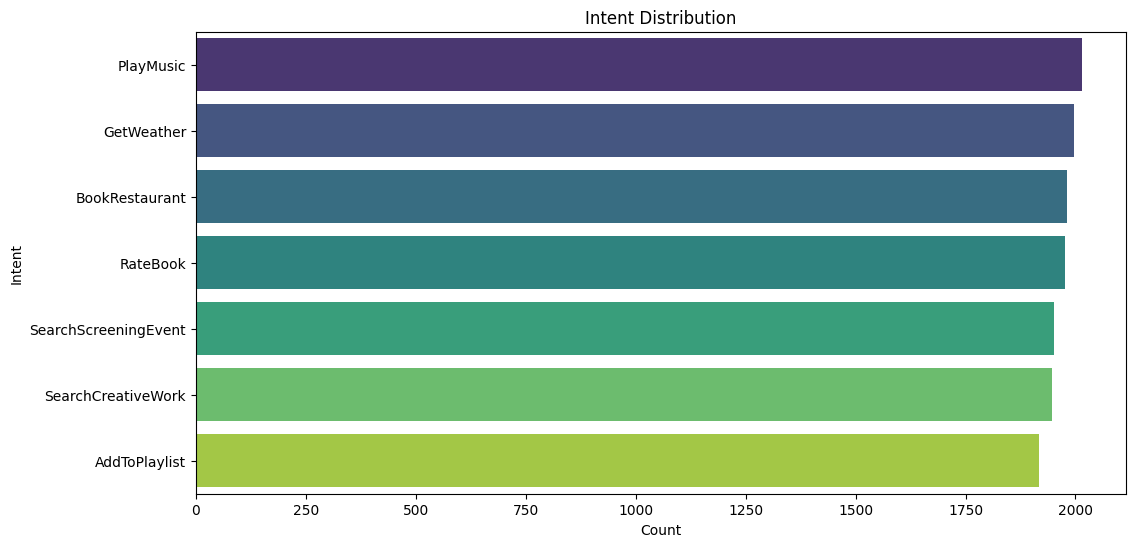

In [89]:
intent_distribution = data_snips['intent'].value_counts().reset_index()
intent_distribution.columns = ['intent', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='intent', data=intent_distribution, palette='viridis')

plt.title('Intent Distribution')
plt.xlabel('Count')
plt.ylabel('Intent')
plt.show()

In [91]:
# Slot Distribution
slot_list = data_snips['slot'].apply(lambda x: x.split()).explode().value_counts().reset_index()
slot_list.columns = ['slot', 'count']

plt.figure(figsize=(12, 20))
ax = sns.barplot(x='count', y='slot', data=slot_list, palette='viridis')
ax.set_xscale('log')
plt.title('Slot Distribution')
plt.xlabel('Count')
plt.ylabel('Slot')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4888\3524561075.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='count', y='slot', data=slot_list, palette='viridis')


In [92]:
# Slot Distribution
slot_list = data_snips['slot'].apply(lambda x: x.split()).explode().value_counts()

# Calculate the total count of slots
total_count = slot_list.sum()

# Calculate the cutoff value
cutoff_value = 0.1 * total_count

# Identify slots below the cutoff value
small_slots = slot_list[slot_list < cutoff_value]

# Combine small slots into 'Other' category
other_count = small_slots.sum()
slot_list = slot_list.drop(small_slots.index)
slot_list['Other'] = other_count

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(slot_list, labels=slot_list.index, autopct='%1.1f%%', startangle=140)
plt.title('Slot Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

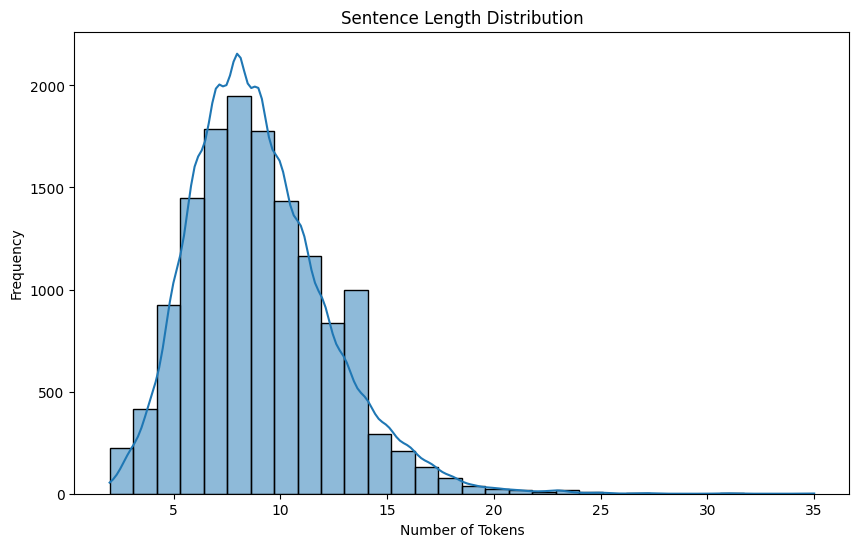

In [94]:
# Token Analysis
data_snips['num_tokens'] = data_snips['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data_snips['num_tokens'], kde=True, bins=30)
plt.title('Sentence Length Distribution')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()


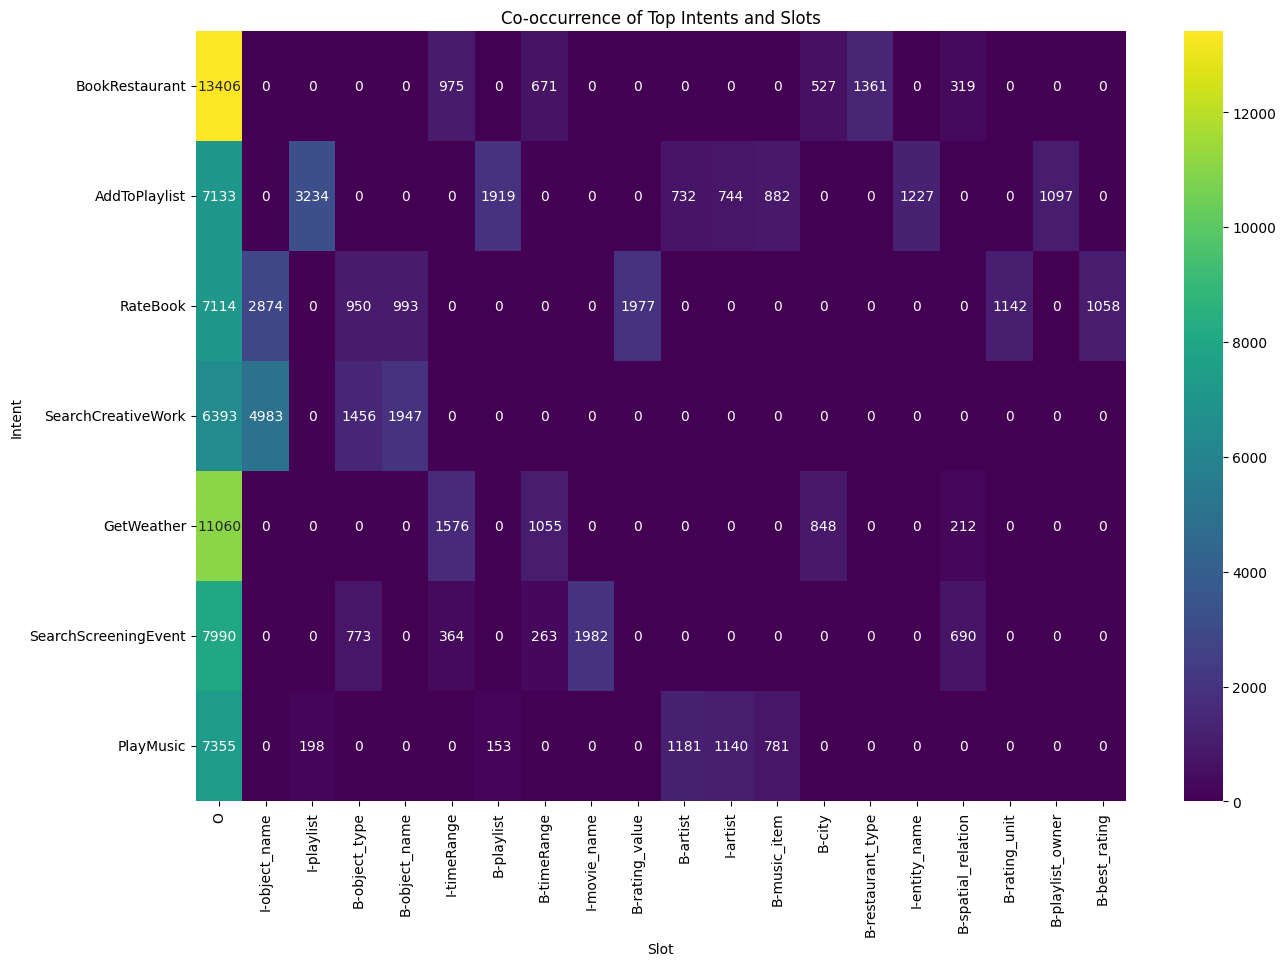

In [95]:
# Split slots into separate rows
data_slots_expanded = data_snips.copy()
data_slots_expanded['slot'] = data_slots_expanded['slot'].apply(lambda x: x.split())

# Create a new dataframe to store intent-slot pairs
intent_slot_pairs = []
for _, row in data_slots_expanded.iterrows():
    intent = row['intent']
    slots = row['slot']
    for slot in slots:
        intent_slot_pairs.append((intent, slot))

data_intent_slot = pd.DataFrame(intent_slot_pairs, columns=['intent', 'slot'])

# Co-occurrence Analysis between Intents and Slots
intent_slot_cooccurrence = pd.crosstab(data_intent_slot['intent'], data_intent_slot['slot'])

# Get top N slots and intents
N = 20
top_slots = intent_slot_cooccurrence.sum().sort_values(ascending=False).head(N).index
top_intents = intent_slot_cooccurrence.loc[:, top_slots].sum(axis=1).sort_values(ascending=False).head(N).index

# Filter the co-occurrence matrix
filtered_cooccurrence = intent_slot_cooccurrence.loc[top_intents, top_slots]

plt.figure(figsize=(15, 10))
sns.heatmap(filtered_cooccurrence, cmap='viridis', annot=True, fmt="d")
plt.title('Co-occurrence of Top Intents and Slots')
plt.xlabel('Slot')
plt.ylabel('Intent')

# Rotate X-axis labels
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

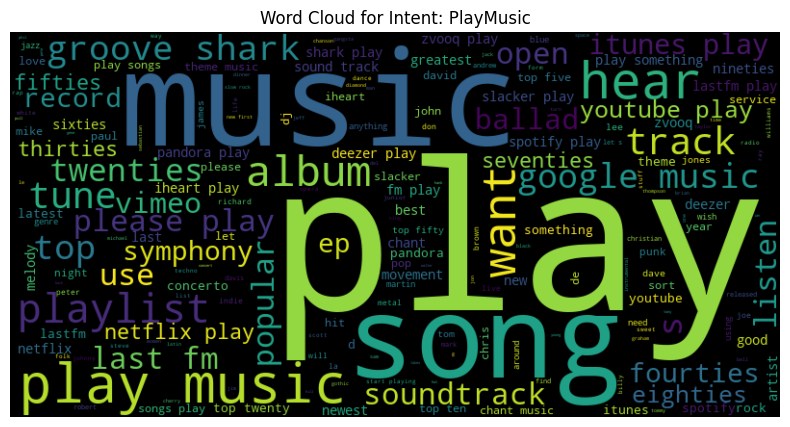

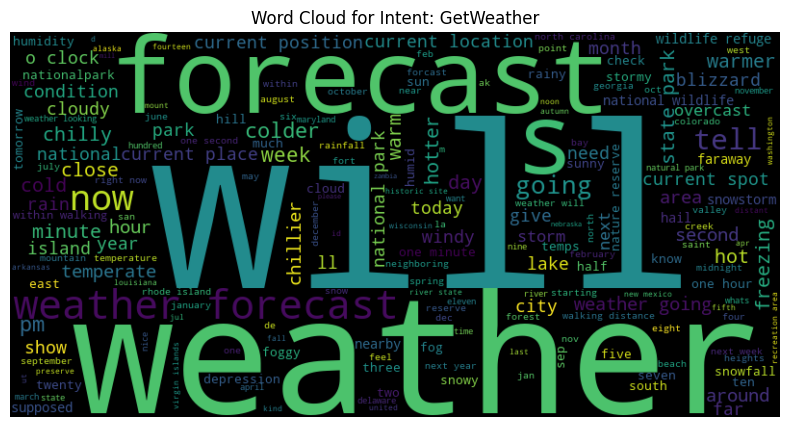

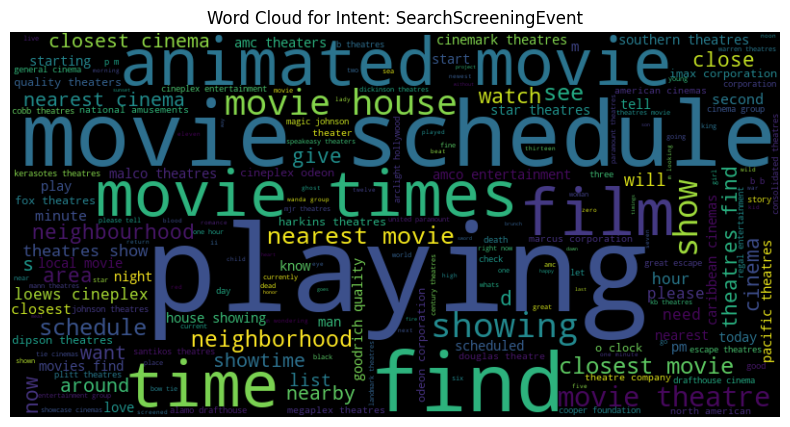

In [96]:
# Count occurrences of each intent
intent_counts = data_snips['intent'].value_counts()

# Determine top intents, let's say top 5
top_intents = intent_counts.head(5).index.tolist()

# Word Cloud for each top intent
for intent in top_intents:
    text = ' '.join(data_snips[data_snips['intent'] == intent]['text'])
    wordcloud = WordCloud(width=800, height=400).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Intent: {intent}')
    plt.axis('off')
    plt.show()